In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from sklearn.linear_model import LinearRegression

In [1]:
from statsmodels.tsa.stattools import coint

In [98]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
def get_data():
    symbols = pd.read_csv("symbols.csv")
    df = pd.DataFrame()
    start = '2010-01-01'
    end = '2018-01-01'
    for symbol in pd.read_csv("symbols.csv")["ticker"].values:
        try:
            mydata = data.DataReader(symbol, 'yahoo', start, end)
            path ="./data/" + symbol + ".csv"
            mydata.to_csv(path)
            df[symbol] = mydata['Close']
        except:
            continue
    return df

In [4]:
dat = get_data()

In [35]:
dat.dropna(axis=1, inplace=True)
dat.shape

(2014, 456)

In [37]:
def train_test_split(df):
    return df[:'2017-01-01'], df['2017-01-01':]
train, test = train_test_split(dat)

In [38]:
s = train.corr().abs().unstack().drop_duplicates()

In [39]:
corr = s.sort_values()

In [40]:
pairs = list(corr.index)[-200:-1]

In [41]:
dat.dropna(axis = 1)
ans = []
for pair in pairs:
    _, p_value, _ = coint(dat[[pair[0]]], dat[[pair[1]]])
    if p_value < 0.05:
        ans.append(pair)

In [45]:
ans

[('CMCSA', 'MMC'),
 ('COST', 'HD'),
 ('PKI', 'TMO'),
 ('BDX', 'LMT'),
 ('AOS', 'STZ'),
 ('HON', 'TMO'),
 ('CMCSA', 'IT'),
 ('FIS', 'MMC'),
 ('ADP', 'DHR'),
 ('CB', 'DTE'),
 ('BDX', 'BSX'),
 ('IFF', 'TMO'),
 ('AON', 'ADP'),
 ('CMCSA', 'RE'),
 ('APH', 'FIS'),
 ('AWK', 'WEC'),
 ('AEP', 'WEC'),
 ('IT', 'HON'),
 ('DHR', 'IFF'),
 ('MTD', 'SNPS'),
 ('DHR', 'FIS'),
 ('CTAS', 'NOC'),
 ('TJX', 'VRSK'),
 ('ADBE', 'SYK'),
 ('ADP', 'HON'),
 ('AON', 'IFF'),
 ('CB', 'CMCSA'),
 ('AGN', 'CAH'),
 ('DHR', 'IT'),
 ('MMM', 'APH'),
 ('AEE', 'XEL'),
 ('APH', 'ITW'),
 ('AON', 'DHR'),
 ('ADP', 'TRV'),
 ('AEP', 'NEE'),
 ('LNT', 'AEP'),
 ('AON', 'FIS'),
 ('AEP', 'DTE'),
 ('FISV', 'CLX'),
 ('MMC', 'NEE'),
 ('MO', 'CMS'),
 ('MMM', 'TMO'),
 ('EFX', 'NI'),
 ('CB', 'HON'),
 ('BDX', 'STZ'),
 ('MMC', 'SPGI'),
 ('MO', 'NI'),
 ('NDAQ', 'NOC'),
 ('APH', 'MMC'),
 ('BDX', 'NOC'),
 ('LNT', 'AWK'),
 ('AEP', 'CMS'),
 ('STZ', 'NDAQ'),
 ('SNA', 'DIS'),
 ('CHD', 'TDG'),
 ('CB', 'MMC'),
 ('MHK', 'V'),
 ('LNT', 'NEE'),
 ('AGN', 'HB

Download industry label from:
http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NASDAQ&render=download
http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NYSE&render=download


In [80]:
company = pd.concat([pd.read_csv("companylist.csv"), pd.read_csv("companylist2.csv")])
company.set_index("Symbol", inplace=True)

In [87]:
coint_stocks = pd.DataFrame(ans, columns=["stock1", "stock2"])
coint_stocks["stock_1_industry"] = coint_stocks.stock1.apply(lambda x: company.loc[x]["Industry"])
coint_stocks["stock_2_industry"] = coint_stocks.stock2.apply(lambda x: company.loc[x]["Industry"])

In [90]:
coint_stocks["same_industry"] = np.where(coint_stocks.stock_1_industry == coint_stocks.stock_2_industry, True, False)

In [99]:
stocks_industry = coint_stocks[coint_stocks.same_industry == True]

In [92]:
coint_stocks["stock_1_sector"] = coint_stocks.stock1.apply(lambda x: company.loc[x]["Sector"])
coint_stocks["stock_2_sector"] = coint_stocks.stock2.apply(lambda x: company.loc[x]["Sector"])
coint_stocks["same_sector"] = np.where(coint_stocks.stock_1_sector == coint_stocks.stock_2_sector, True, False)

In [100]:
stocks_sector = coint_stocks[coint_stocks.same_sector == True]

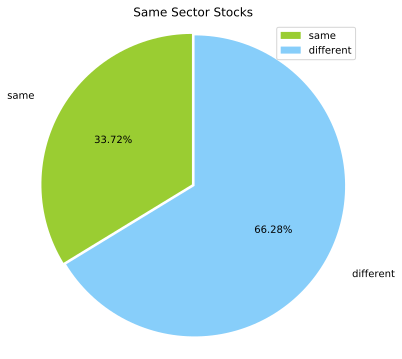

In [107]:
plt.figure(figsize=(6,6)) 
labels = ["same", "different"] 
sizes = [stocks_sector.shape[0], coint_stocks.shape[0] - stocks_sector.shape[0]] 
colors = ['yellowgreen','lightskyblue'] 
explode = (0.02,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.title('Same Sector Stocks')
plt.legend()
plt.show()

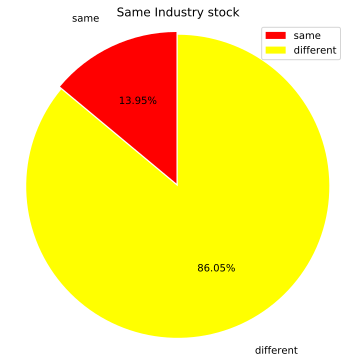

In [118]:
plt.figure(figsize=(6,6)) 
labels = ["same", "different"] 
sizes = [stocks_industry.shape[0], coint_stocks.shape[0] - stocks_industry.shape[0]] 
colors = ['red','yellow'] 
explode = (0.02,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.title('Same Industry stock')
plt.legend()
plt.show()

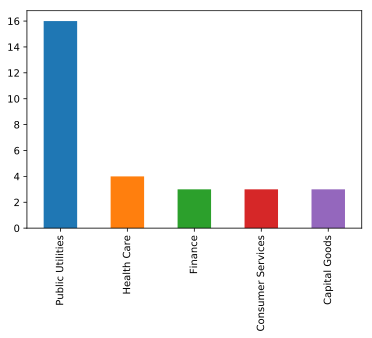

In [116]:
stocks_sector.stock_1_sector.value_counts().plot(kind="bar")

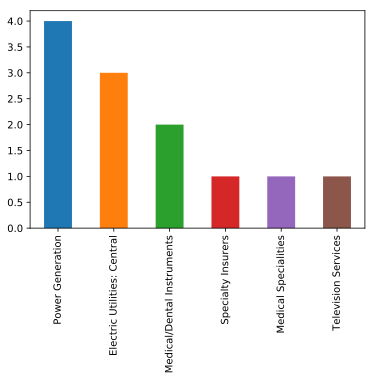

In [117]:
stocks_industry.stock_1_industry.value_counts().plot(kind="bar")